In [1]:
import pandas as pd
import numpy as np
from joblib import load
import glob
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import random
import sklearn.model_selection as ms
from sklearn import ensemble

In [54]:
import folium

In [2]:
outgoing = pd.read_csv('../data/outgoing.csv.gz')

In [3]:
incoming = pd.read_csv('../data/incoming.csv.gz')

In [12]:
incoming

,Unnamed: 0,end station id,stop_date,season,dayofweek,stop_hour,incoming_bike_count,dock_demand
0,0,72,2013-06-01,summer,Saturday,1,1,Low
1,1,72,2013-06-01,summer,Saturday,2,1,Low
2,2,72,2013-06-01,summer,Saturday,7,3,Medium
3,3,72,2013-06-01,summer,Saturday,10,1,Low
4,4,72,2013-06-01,summer,Saturday,11,1,Low
...,...,...,...,...,...,...,...,...
22482426,22482426,4249,2020-11-30,fall,Monday,18,1,Low
22482427,22482427,4249,2020-11-30,fall,Monday,19,1,Low
22482428,22482428,4249,2020-11-30,fall,Monday,20,3,Medium
22482429,22482429,4249,2020-11-30,fall,Monday,21,1,Low


In [34]:
outgoing_daily = outgoing.groupby(['start_hour'])[['outgoing_bike_count']].mean().rename(columns={'start_hour':'hour'}).reset_index()

In [35]:
outgoing_daily

,start_hour,outgoing_bike_count
0,0,1.910570
1,1,1.641125
2,2,1.480433
3,3,1.355859
4,4,1.262222
5,5,1.671751
6,6,2.962403
7,7,4.532667
8,8,6.724810
9,9,5.403018


In [36]:
incoming_daily = incoming.groupby(['stop_hour'])[['incoming_bike_count']].mean().reset_index()

In [37]:
combined = incoming_daily.merge(outgoing_daily, left_on = 'stop_hour', right_on = 'start_hour', how = 'inner')

In [38]:
combined

,stop_hour,incoming_bike_count,start_hour,outgoing_bike_count
0,0,1.587779,0,1.910570
1,1,1.603763,1,1.641125
2,2,1.444922,2,1.480433
3,3,1.320827,3,1.355859
4,4,1.238349,4,1.262222
5,5,1.609013,5,1.671751
6,6,2.958532,6,2.962403
7,7,4.382675,7,4.532667
8,8,6.762456,8,6.724810
9,9,6.217276,9,5.403018


(0.95, 8.2)

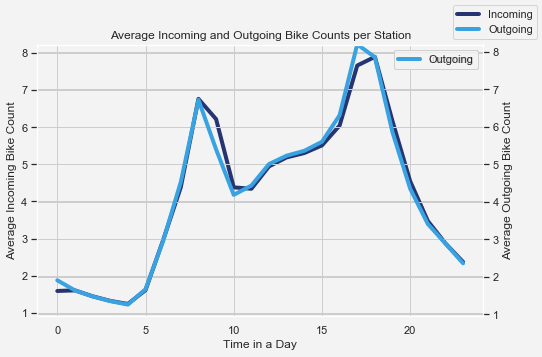

In [53]:
sns.set(rc={'axes.facecolor':'#f3f3f3', 'figure.facecolor':'#f3f3f3', 'grid.color': '#cdcdcd'})
colors = ["#39a2e1","#263571","#343335","#7a6155","#574746","#60645f","#8e8c8e","#ea2029"]
sns.set_palette(sns.color_palette(colors))
plt.figure(figsize = (8,5))
ax = sns.lineplot(x = 'stop_hour', y = 'incoming_bike_count', data = combined, color = "#263571", label = 'Incoming',
                  linewidth = 4)
ax2 = ax.twinx()
sns.lineplot(x = 'stop_hour', y = 'outgoing_bike_count', data = combined, color = "#39a2e1", label = 'Outgoing',
                  linewidth = 4, ax = ax2)
ax.figure.legend()
plt.title('Average Incoming and Outgoing Bike Counts per Station')
ax.set_xlabel('Time in a Day', fontsize=12)
ax.set_ylabel('Average Incoming Bike Count', fontsize=12)
ax2.set_ylabel('Average Outgoing Bike Count', fontsize=12)
plt.ylim(0.95,8.2)